In [21]:
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

num_qudits = 6
colors = sns.color_palette("deep")
markers = ['o', 's', 'D', '^', 'v', '<', '>']

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Latin Modern"],
    "font.size": 14
})

## Spinless

In [22]:
# import data 
with open('../netket/tv_model_data.json', 'r') as file:
    exact = json.load(file)
with open('tv_model_data_sim.json', 'r') as file:
    simul = json.load(file)

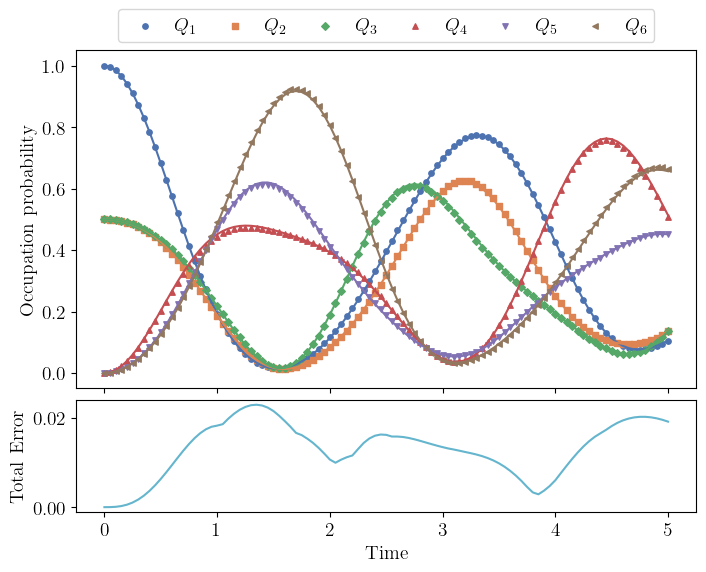

In [25]:
total_error = np.sum(np.abs(np.array(simul["nums"]) - np.array(exact["nums"])), axis=1)

fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)
ax1 = fig.add_subplot(gs[0])

for i in range(num_qudits):
    ax1.scatter(simul["temps"], np.array(simul["nums"])[:,i], label=f"$Q_{i+1}$", s=15, marker=markers[i], color=colors[i])
    ax1.plot(exact["temps"], np.array(exact["nums"])[:,i], color=colors[i])

ax1.set_ylabel("Occupation probability")
ax1.label_outer()

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=num_qudits, 
    handletextpad=0.5, borderaxespad=0.5, columnspacing=1.0
)

# Bottom plot
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(simul["temps"], total_error, label="Total Error", color=colors[-1])
ax2.set_ylabel(r"Total Error")
ax2.set_xlabel("Time")

plt.savefig("tv_model_numbers.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()

## Spinful

In [26]:
# import data 
with open('../netket/spinful_data.json', 'r') as file:
    exact = json.load(file)
with open('spinful_data_sim.json', 'r') as file:
    simul = json.load(file)

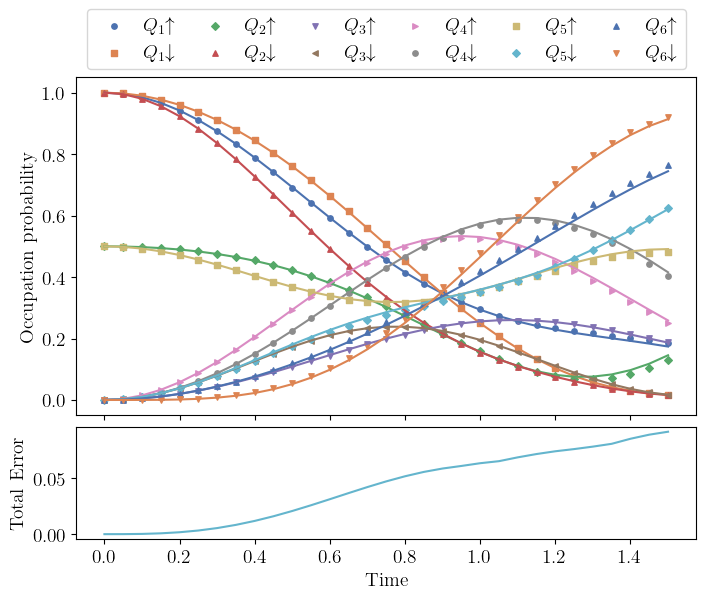

In [27]:
num_qudits = 12

total_error = np.sum(np.abs(np.array(simul["nums"]) - np.array(exact["nums"])), axis=1)

fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)
ax1 = fig.add_subplot(gs[0])

for i in range(num_qudits):
    num_idx = i // 2
    arrow = r"$\uparrow$" if i%2==0 else r"$\downarrow$"
    ax1.scatter(simul["temps"], np.array(simul["nums"])[:,i], label=f"$Q_{num_idx+1}$"+arrow, s=15, marker=markers[i % len(markers)], color=colors[i% len(colors)])
    ax1.plot(exact["temps"], np.array(exact["nums"])[:,i], color=colors[i% len(colors)])

ax1.set_ylabel("Occupation probability")
ax1.label_outer()

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.23), ncol=6, 
    handletextpad=0.5, borderaxespad=0.5, columnspacing=1.0
)

# Bottom plot
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(simul["temps"], total_error, label="Total Error", color=colors[-1])
ax2.set_ylabel(r"Total Error")
ax2.set_xlabel("Time")

plt.savefig("spinful_numbers.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()